In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Make Data

<IPython.core.display.Javascript object>


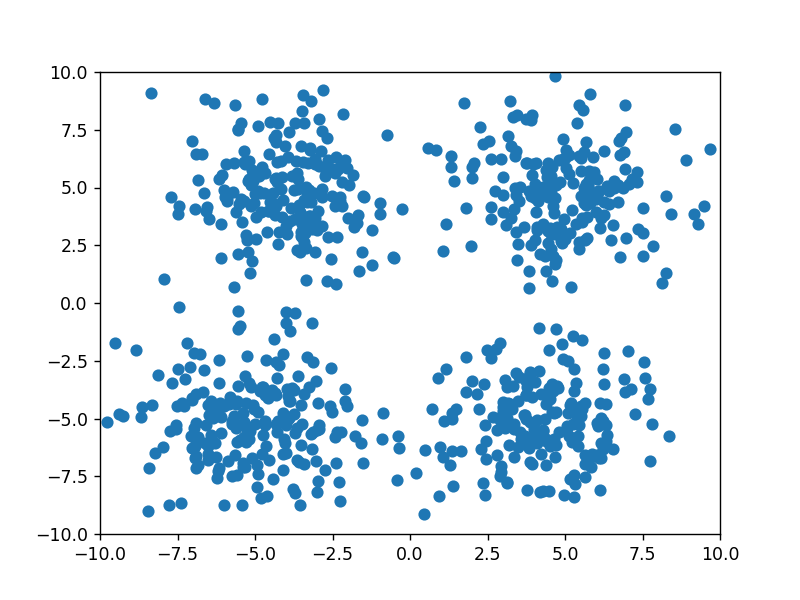

(-10.0, 10.0)

In [2]:
X, y = make_blobs(n_samples=1000, centers=[[-5,-5],[5,5],[-4,5],[4,-5]], n_features=2, random_state=2, 
                  shuffle=True, cluster_std=1.8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plt.scatter(X_train.T[0], X_train.T[1])
plt.xlim(-10,10)
plt.ylim(-10,10)

# Code

In [3]:
class MeanShift:
    def __init__(self, λ):
        self.λ = λ # Bandwidth
    
    def fit(self, X, m, kernel, max_iter=50):
        '''
        X = training data
        m = initial modes of the k clusters
        kernel = 'flat' or 'gaussian'
        '''
        k = len(m) # Number of clusters
        
        for iteration in range(max_iter):
            # Updates the modes
            for i in range(k):
                m[i] = (self.__Kernel(X - m[i], self.λ, kernel) @ X) / np.sum(self.__Kernel(X - m[i], self.λ, kernel), axis=0)
        self.m = m
        self.labels = self.predict(X) # Assigns each training example its corresponding class
        
    def predict(self, x):
        return np.array([np.argmin(self.__predict_each(x_i)) for x_i in x])
    
    # Private methods
    def __Kernel(self, x, λ, kernel_type):
        if kernel_type=='flat':
            return np.array([1 if np.linalg.norm(x_i) <= λ else 0 for x_i in x])
            
        if kernel_type=='gaussian':
            # We remove the constant at the front because it suppresses the value of the exponential
            # and thus potentially contributing to slower convergence
            return np.array([np.exp(-np.linalg.norm(x_i)/(2*λ**2)) for x_i in x])
        
    def __predict_each(self, x):
        # To classify, one only computes the distance of a new point x to all the modes.
        # Its corresponding classification is then the mode nearest to it.
        # Alternatively, we can use the Gaussian and simply select the one with the highest probability
        return np.array([np.linalg.norm(m - x) for m in self.m])

# Test our code

In [6]:
λ = 0.5 # Bandwidth
m = np.array([[-6, -5], [7,6], [6,-6], [-5,7]], dtype=float) # initial mode
k = len(m)

meanshift_test = MeanShift(λ)
meanshift_test.fit(X_train, m, 'gaussian')
meanshift_test.m # gives the centers of the clusters

array([[-5.41088271, -5.06640538],
       [ 5.60469678,  4.80051429],
       [ 4.12653121, -5.28773139],
       [-3.70482012,  4.5350215 ]])

<IPython.core.display.Javascript object>


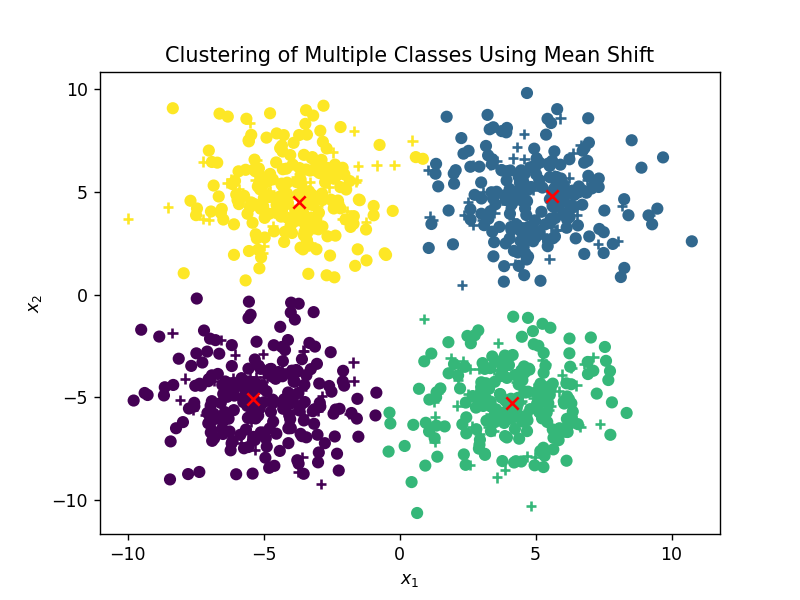

Text(0, 0.5, '$x_2$')

In [10]:
plt.figure()
plt.scatter(X_train.T[0], X_train.T[1], c=meanshift_test.labels)
plt.scatter(X_test.T[0], X_test.T[1], c=meanshift_test.predict(X_test), marker='+')
plt.scatter(meanshift_test.m.T[0], meanshift_test.m.T[1], marker='x', c='red', s=50)
plt.title('Clustering of Multiple Classes Using Mean Shift')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")